# `heatmap` 플롯

이 노트북은 `shap.plots.heatmap` 함수를 사용하는 방법을 설명(그리고 문서화)하기 위해 만들어졌습니다. 이 노트북은 고전적인 UCI 성인 소득 데이터 집합(1990년대에 연간 소득이 5만 달러 이상인지 예측하기 위한 분류 작업)에서 학습된 XGBoost 모델을 사용합니다.

In [1]:
import xgboost
import shap

#  XGBoost 모델 훈련
X,y = shap.datasets.adult()
model = xgboost.XGBClassifier(n_estimators=100, max_depth=2).fit(X, y)

# SHAP 값 계산
explainer = shap.Explainer(model, X)
shap_values = explainer(X[:1000])

SHAP 값의 행렬을 히트맵 플롯 함수에 전달하면 인스턴스가 X축에, 모델 입력이 Y축에, 색 눈금으로 인코딩된 SHAP 값이 포함된 플롯이 만들어집니다. 기본적으로 샘플은 설명 유사도에 따른 계층적 클러스터링을 기반으로 샘플의 순서를 지정하는 `shap.order.hclust`를 사용하여 정렬됩니다. 따라서 동일한 이유로 동일한 모델 출력을 가진 샘플이 함께 그룹화됩니다(예: 아래 그림에서 자본 이득의 영향력이 높은 사람).

모델의 출력은 히트맵 매트릭스 위에 표시되며(설명의 '.base_value'를 중심으로), 각 모델 입력의 글로벌 중요도는 막대 그래프로 플롯의 오른쪽에 표시됩니다(기본적으로 이것은 전체 중요도의 `shap.order.abs.mean` 측정값입니다).

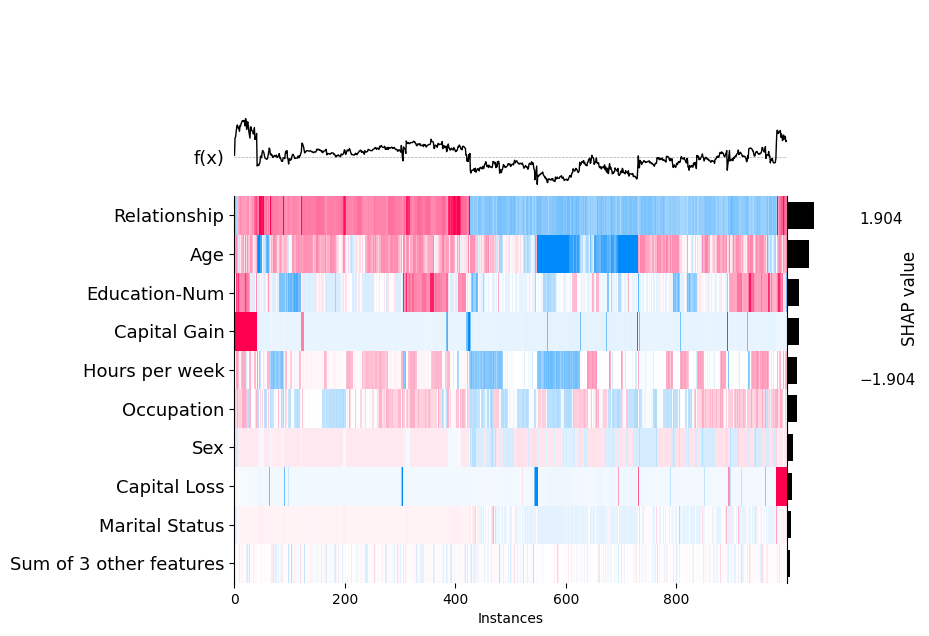

In [2]:
shap.plots.heatmap(shap_values)

`max_display` 매개변수를 늘리면 더 많은 기능을 표시할 수 있습니다: 

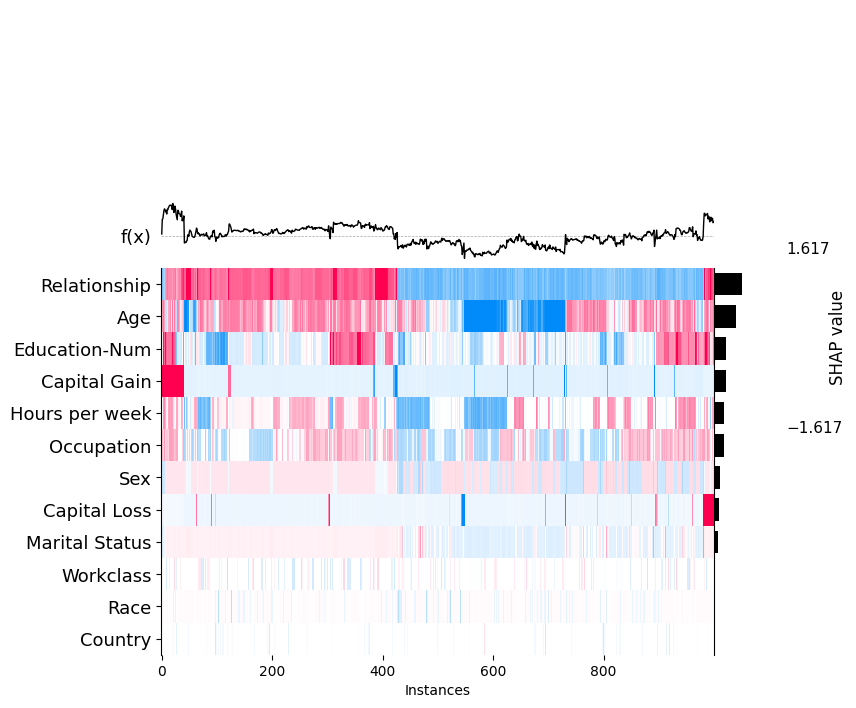

In [3]:
shap.plots.heatmap(shap_values, max_display=12)

## 정렬 순서 및 전역 기능 중요도 값 변경

기능의 전반적인 중요도를 측정하는 방식(및 정렬 순서)을 `feature_values` 매개변수에 값 집합을 전달하여 변경할 수 있습니다. 기본적으로 `feature_values=shap.Explanation.abs.mean(0)`이지만, 아래에서는 모든 샘플에서 피처의 최대 절대값을 기준으로 정렬하는 방법을 보여줍니다:

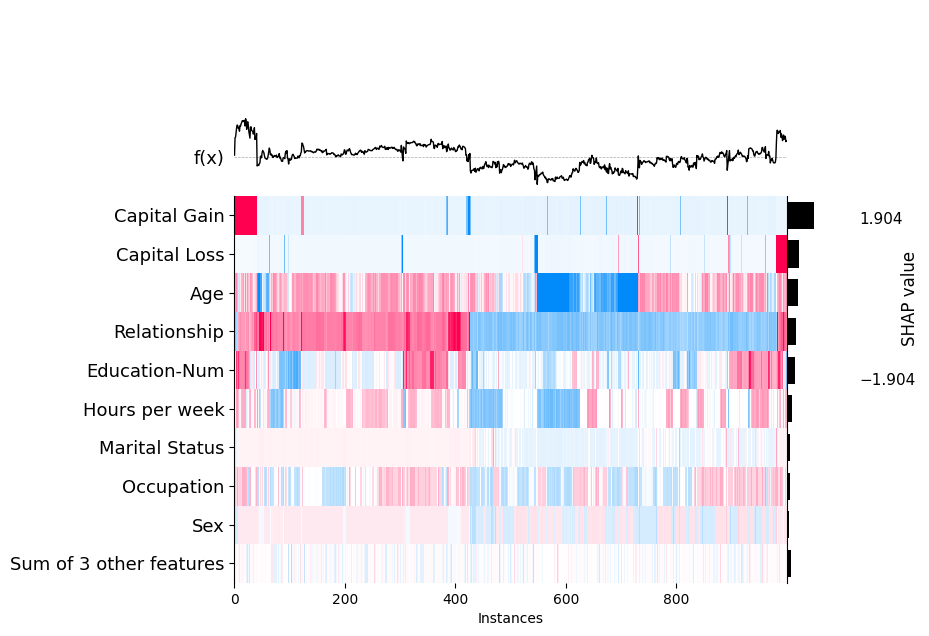

In [5]:
shap.plots.heatmap(shap_values, feature_values=shap_values.abs.max(0))

`instance_order` 매개 변수를 사용하여 인스턴스의 순서를 제어할 수도 있습니다. 기본적으로 이 매개변수는 유사한 설명을 가진 샘플을 함께 그룹화하기 위해 `shap.Explanation.hclust(0)`로 설정되어 있습니다. 아래에서는 모든 특징에 대한 SHAP 값의 합을 기준으로 정렬하면 데이터에 대한 상호 보완적인 관점을 제공하는 방법을 보여줍니다:

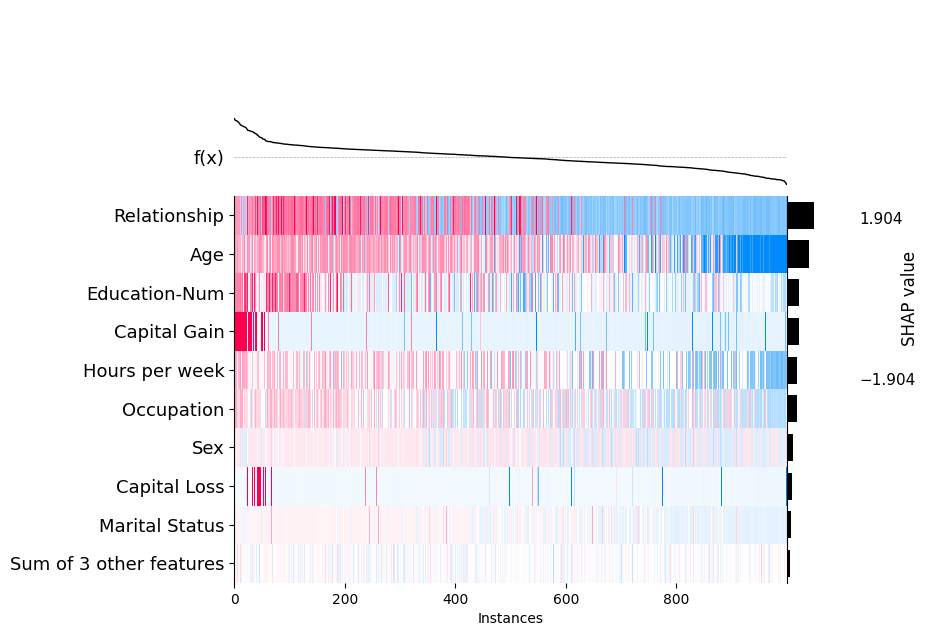

In [6]:
shap.plots.heatmap(shap_values, instance_order=shap_values.sum(1))

<hr>
Have an idea for more helpful examples? Pull requests that add to this documentation notebook are encouraged! 